In [2]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pandas as pd
from datetime import timedelta, datetime
import configparser
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


In [3]:
from numpy import where
from numpy import unique
from matplotlib import pyplot
from matplotlib.pyplot import figure

# define dataset


In [33]:
route_id = 20
stop_id = 1748
direction_id = 1
cd_date = '2021-08-23'

In [34]:
DB = "dm"
engine = create_engine(f"postgresql://localhost:5432/{DB}")
# fig, ax = plt.subplots()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(100, 10))
sql = f"""select
    *
from
    (
        select
            extract(
                epoch
                from
                    processed_arrival_datetime
            ) as processed_arrival_timestamp_secs,
            processed_arrival_datetime,
            LAG(
                extract(
                    epoch
                    from
                        processed_arrival_datetime
                )
            ) OVER (
                ORDER BY
                    processed_arrival_datetime
            ) as lagging_time_secs,
            EXTRACT(
                EPOCH
                FROM
                    (
                        processed_arrival_datetime - LAG(processed_arrival_datetime) OVER (
                            ORDER BY
                                processed_arrival_datetime
                        )
                    )
            ) as inter_arrival_time,
            EXTRACT(
                EPOCH
                FROM
                    (
                        LEAD(processed_arrival_datetime) OVER (
                            ORDER BY
                                processed_arrival_datetime
                        ) - processed_arrival_datetime
                    )
            ) as next_arrival_time
        from
            "joinedsttcdebug_test" a
        where
            route_id = '{route_id}'
            and stop_id = '{stop_id}'
            and direction_id = '{direction_id}'
            and cd_date = '{cd_date}'
        order by
            a.processed_arrival_datetime) a where lagging_time_secs is not null and next_arrival_time is not null"""


<Figure size 10000x1000 with 0 Axes>

In [35]:
print(sql)

select
    *
from
    (
        select
            extract(
                epoch
                from
                    processed_arrival_datetime
            ) as processed_arrival_timestamp_secs,
            processed_arrival_datetime,
            LAG(
                extract(
                    epoch
                    from
                        processed_arrival_datetime
                )
            ) OVER (
                ORDER BY
                    processed_arrival_datetime
            ) as lagging_time_secs,
            EXTRACT(
                EPOCH
                FROM
                    (
                        processed_arrival_datetime - LAG(processed_arrival_datetime) OVER (
                            ORDER BY
                                processed_arrival_datetime
                        )
                    )
            ) as inter_arrival_time,
            EXTRACT(
                EPOCH
                FROM
                    (
                       

READ SQL


In [36]:
time_graph = pd.read_sql(sql, engine)


In [37]:
time_graph.head()

,processed_arrival_timestamp_secs,processed_arrival_datetime,lagging_time_secs,inter_arrival_time,next_arrival_time
0,1.629698e+09,2021-08-23 05:58:33,1.629697e+09,1320.0,960.0
1,1.629699e+09,2021-08-23 06:14:33,1.629698e+09,960.0,900.0
2,1.629700e+09,2021-08-23 06:29:33,1.629699e+09,900.0,870.0
3,1.629701e+09,2021-08-23 06:44:03,1.629700e+09,870.0,840.0
4,1.629702e+09,2021-08-23 06:58:03,1.629701e+09,840.0,840.0


In [38]:
import random

number_of_colors = 7

color = [
    "#" + "".join([random.choice("0123456789ABCDEF") for j in range(6)])
    for i in range(number_of_colors)
]
print(color)


['#E263AA', '#09D9B8', '#FBC3E1', '#DF3802', '#359C89', '#4529DB', '#0CD90E']


In [39]:
print(time_graph.head())
time_graph["regularity"] = time_graph.apply(
    lambda x: x["inter_arrival_time"] / 60 < 12, axis=1
)
time_graph["estimated_time_group"] = time_graph.apply(
    lambda x: 6
    if x["processed_arrival_datetime"].hour in [0, 1, 2, 3, 4]
    else 1
    if x["processed_arrival_datetime"].hour < 9
    else 2
    if x["processed_arrival_datetime"].hour < 15
    else 3
    if x["processed_arrival_datetime"].hour < 18
    else 4
    if x["processed_arrival_datetime"].hour < 21
    else 5,
    axis=1,
)
print(time_graph.head())
# df.head()
# print(df.count())
# df['arrival_time'] = df['processed_arrival_datetime']
# df = df.set_index("processed_arrival_datetime")
# # Labelling the axes and setting a
# # title
# plt.xlabel("Date")
# plt.ylabel("Values")
# plt.title("Bar Plot of 'A'")
# df['xyz'] = df['time_diff'].apply(lambda x: str(x).lower())
# # a= plt.plot(df.index,df["lag_time"],'bo',label= )
# # a=plt.bar(df.index, df["lag_time"],  align='edge',width=0.001)
# # a=plt.step(df.index, df["time_diff"], drawstyle='steps', label=list(df['xyz']))
# # plt.plot(df.index, df["time_diff"], 'o--', color='grey', alpha=0.3)
# # plt.bar_label(a,labels= df['xyz'],label_type='edge')
# # plt.show()


   processed_arrival_timestamp_secs processed_arrival_datetime  \
0                      1.629698e+09        2021-08-23 05:58:33   
1                      1.629699e+09        2021-08-23 06:14:33   
2                      1.629700e+09        2021-08-23 06:29:33   
3                      1.629701e+09        2021-08-23 06:44:03   
4                      1.629702e+09        2021-08-23 06:58:03   

   lagging_time_secs  inter_arrival_time  next_arrival_time  
0       1.629697e+09              1320.0              960.0  
1       1.629698e+09               960.0              900.0  
2       1.629699e+09               900.0              870.0  
3       1.629700e+09               870.0              840.0  
4       1.629701e+09               840.0              840.0  
   processed_arrival_timestamp_secs processed_arrival_datetime  \
0                      1.629698e+09        2021-08-23 05:58:33   
1                      1.629699e+09        2021-08-23 06:14:33   
2                      1.629700e+

fig, ax = plt.subplots()<br>
ax.scatter(df.index, df["lag_time"])<br>
print(df.info())


for i, row in df.iterrows():<br> # print(row.index[i])<br>
if i==0:<br>
continue<br>
ax.annotate(str(row['time_diff']), (row['arrival_time'], row['lag_time']))<br> # print(row['c1'], row['c2'])<br>

# for i, txt in enumerate(df):<br>

# ax.annotate(txt, (z[i], y[i]))


plt.show()


In [40]:
X = (
    time_graph.loc[
        :,
        [
            "processed_arrival_timestamp_secs",
            "inter_arrival_time",
            "lagging_time_secs",
            "regularity",
            "estimated_time_group",
            "next_arrival_time"
        ],
    ]
    .dropna()
    .to_numpy()
)
# X
gm = GaussianMixture(n_components=7, tol=0.00001, max_iter=200, verbose=1).fit(X)
yhat = gm.predict(X)


Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
Initialization converged: True


In [17]:
time_graph["cluster"] = list(yhat)
time_graph["cluster"] = time_graph["cluster"] + 1
time_graph["color"] = time_graph.apply(
    lambda x: color[x["cluster"] - 1],
    axis=1,
)

time_graph.to_csv("clustered_data.csv")


In [41]:
! open clustered_data.csv

In [16]:
time_graph.head(145)


,processed_arrival_timestamp_secs,processed_arrival_datetime,lagging_time_secs,inter_arrival_time,regularity,estimated_time_group,cluster,label
0,1.629697e+09,2021-08-23 05:35:00,1.629696e+09,900.0,False,1,6,900.0
1,1.629698e+09,2021-08-23 05:50:00,1.629697e+09,900.0,False,1,6,900.0
2,1.629699e+09,2021-08-23 06:05:00,1.629698e+09,900.0,False,1,6,900.0
3,1.629700e+09,2021-08-23 06:19:00,1.629699e+09,840.0,False,1,6,840.0
4,1.629700e+09,2021-08-23 06:31:00,1.629700e+09,720.0,False,1,6,720.0
...,...,...,...,...,...,...,...,...
129,1.629760e+09,2021-08-23 23:12:00,1.629759e+09,900.0,False,5,2,900.0
130,1.629761e+09,2021-08-23 23:27:00,1.629760e+09,900.0,False,5,2,900.0
131,1.629762e+09,2021-08-23 23:42:00,1.629761e+09,900.0,False,5,2,900.0
132,1.629763e+09,2021-08-23 23:57:00,1.629762e+09,900.0,False,5,2,900.0


In [42]:
import matplotlib.dates as mdates

time_graph["label"] = time_graph["inter_arrival_time"].apply(lambda x: str(x).lower())


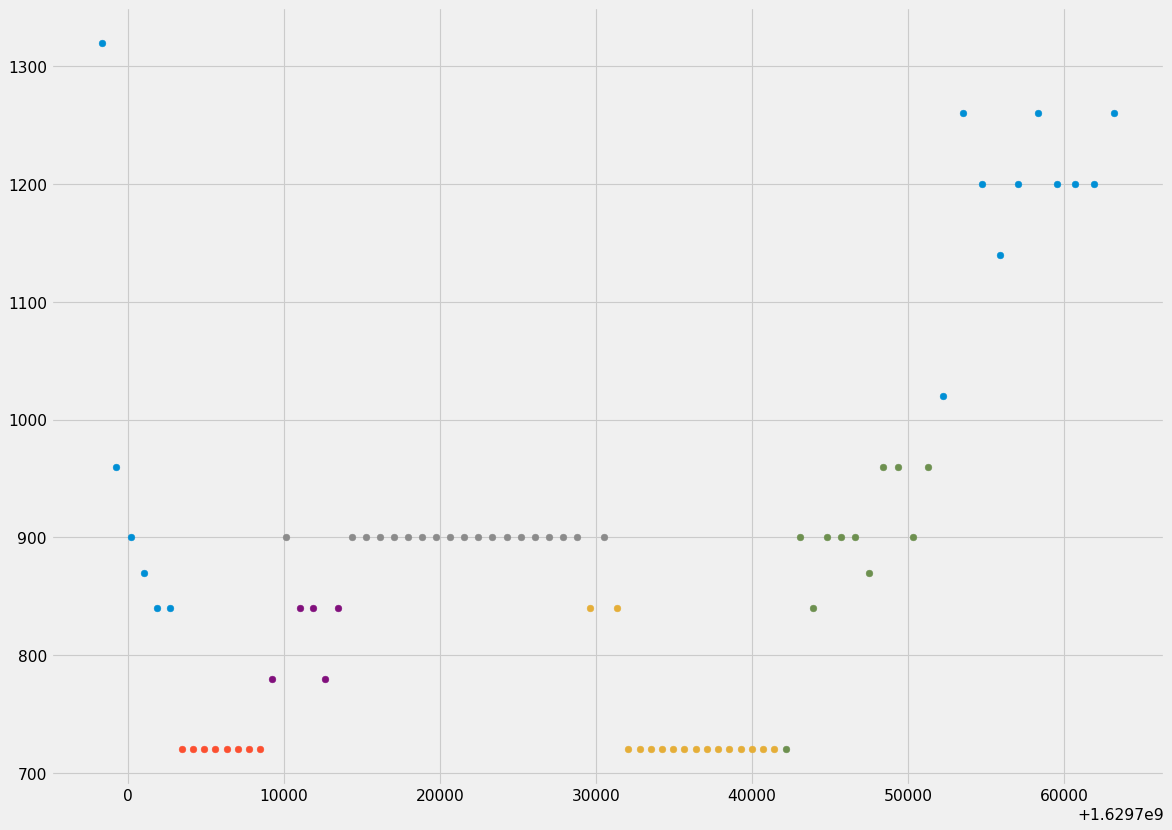

In [43]:
clusters = unique(yhat)
figure(figsize=(16, 12), dpi=80)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

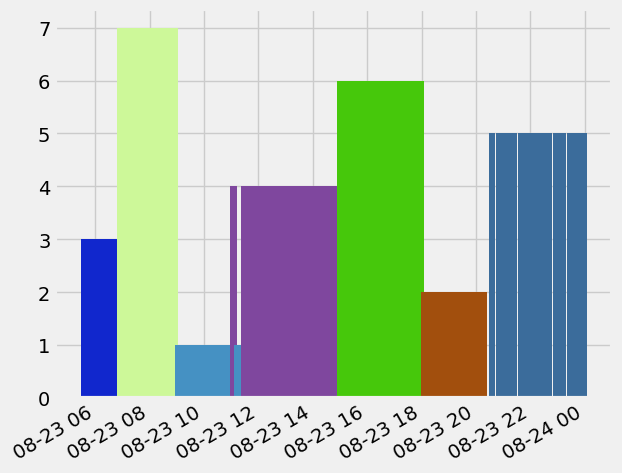

In [26]:
a = plt.bar(
    time_graph["processed_arrival_datetime"],
    time_graph["cluster"],
    label=list(time_graph["label"]),
    color=list(time_graph["color"]),
    width=0.01,
)
plt.tick_params(axis='x', labelrotation=30)
plt.xticks(ha='right')
# plt.setp(plt.get_xticklabels(), rotation=30, ha='right')
plt.show()


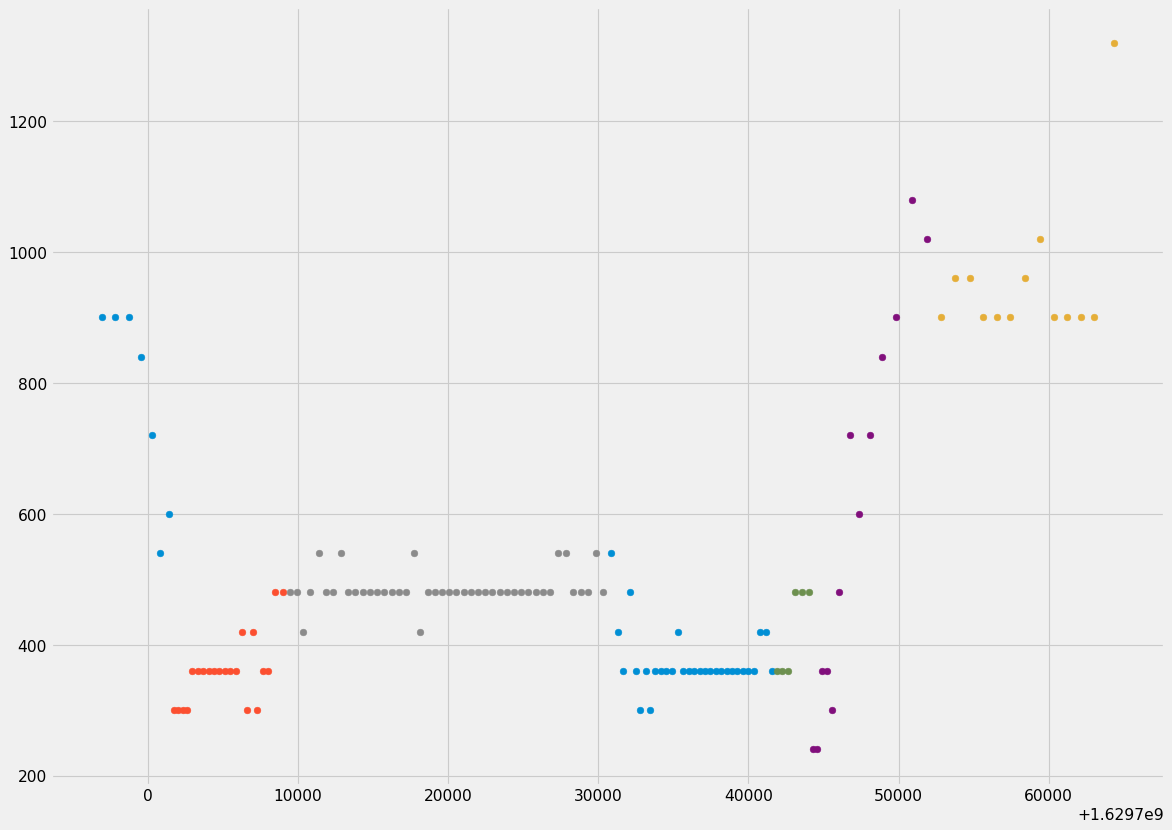

In [7]:
clusters = unique(yhat)
figure(figsize=(16, 12), dpi=80)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
